# 텍스트 다중분류 워드 임베딩(한글 네이버)

In [1]:
# 구글 드라이브와 연결

#from google.colab import auth
#auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Word2Vec

In [0]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1==0.7.4
!pip install rhinoMorph

In [3]:
# 학습할 텍스트 읽기 
import os.path

embedding_dim = 50                                       # 임베딩 차원수 설정

filepath = '/content/gdrive/My Drive/pytest/'
os.chdir(filepath)                                       # 경로 설정
print("Current Directory:", os.getcwd())

with open('wiki_test.txt', 'r', encoding='utf-8') as f:  # 테스트용 파일 읽기 
    data = f.read()

Current Directory: /content/gdrive/My Drive/pytest


In [4]:
# 문장단위 분리 및 형태소 분석기 기동
import rhinoMorph
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

sent_data = sent_tokenize(data)                       # 문장 단위 분리
rn = rhinoMorph.startRhino()                          # RHINO 기동

print('type:', type(sent_data))
print('length:', len(sent_data))           # 전체 문장의 개수
print('sentence sample:', sent_data[:20])  # 형태소 분석 전 모습

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!
type: <class 'list'>
length: 11977
sentence sample: ['<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">\n지미 카터\n\n제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.', '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.', '조지아 공과대학교를 졸업하였다.', '그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다.', '1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다.', '그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.', '1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다.', '대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다.', '조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.', '1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.', '카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.', '카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르 사다트

In [5]:
# 텍스트의 형태소 분석
total_lines = len(sent_data)
cnt = 0
with open(filepath+'word2vec/wiki202003_nationalcorpus_naverratings_morphed.txt', 'w', encoding='utf-8') as f:
    for data_each in sent_data:
        morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
        joined_data_each = ' '.join(morphed_data_each)
        if joined_data_each:
            f.write(joined_data_each + '\n')
        cnt += 1
        if (cnt % 1000) == 0:  # 진행정도 확인을 위해 1000번째 문장마다 확인
            print(round(cnt/total_lines * 100, 3), '%')
    print('Morphological Analysis Completed.')

8.349 %
16.699 %
25.048 %
33.397 %
41.747 %
50.096 %
58.445 %
66.795 %
75.144 %
83.493 %
91.843 %
Morphological Analysis Completed.


In [6]:
# 형태소 분석 결과를 읽어 리스트로 만들기
def read_data(filename, encoding='utf-8'):                # 읽기 함수 정의
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split(' ') for line in f.read().splitlines()]
    return data


data = read_data(filepath+"word2vec/wiki202003_nationalcorpus_naverratings_morphed.txt", 'utf-8')

print(len(data))
print(type(data))
print(data[:3])

11976
<class 'list'>
[['URL', '미', '카터', '미', '카터', '제임스', '얼', '미', '카터', '주니어', '민주당', '출신', '미국', '대통령'], ['미', '카터', '조지아', '섬터', '카운티', '마을', '태어나'], ['조지아', '공과대학', '교', '졸업']]


In [7]:
# 임베딩 구성 
from gensim.models import Word2Vec
os.chdir(filepath+'word2vec/')

model = Word2Vec(sentences=data, size=embedding_dim, window=10, min_count=5, workers=4, sg=1)
model.save('embedding_window10_mincnt5_skipgram.model')

print('Completed.')

Completed.


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [8]:
# 임베딩 값 저장 
words = list(model.wv.vocab)
with open('embedding_window10_mincnt5_skipgram.txt', 'w') as f:
    for word in words:
        data = model.wv[word].tolist()      # 현재 단어의 임베딩 값을 가져온다
        print('data_pre:', data)            # 현재 단어의 임베딩 값을 출력해본다

        data.insert(0, word)                # 시작 부분에 해당 단어를 넣는다
        print('data_after:', data)          # 현재 단어의 이름과 함께 임베딩 값을 출력해본다 

        for item in data:                   # 단어 이름부터 시작하여 각 벡터의 값을 저장한다
            f.write("%s " % item)
        f.write("\n")

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# 유사어 찾기
model = Word2Vec.load('embedding_window10_mincnt5_skipgram.model')    # 미리 만들어진 워드 임베딩을 사용한다 

print('--- 유사단어 출력 ---')
similarWords = model.wv.most_similar(positive=['행복', '웃음', '밝', '기쁨'], topn=5)
print(similarWords)

word = []
for similarWord in similarWords:
    word.append(similarWord[0])

print(word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


--- 유사단어 출력 ---
[('흐뭇', 0.8909333348274231), ('마음', 0.8865163326263428), ('기쁘', 0.8699381351470947), ('마음속', 0.8504815101623535), ('즐겁', 0.8447961807250977)]
['흐뭇', '마음', '기쁘', '마음속', '즐겁']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [14]:
# 두 단어 사이의 유사도 계산
print('--- 두 단어의 유사도 계산 ---')
print('한국과 일본:', model.wv.similarity('한국', '일본'))
print('한국과 미국:', model.wv.similarity('한국', '미국'))
print('한국과 중국:', model.wv.similarity('한국', '중국'))

--- 두 단어의 유사도 계산 ---
한국과 일본: 0.8515057
한국과 미국: 0.7342306
한국과 중국: 0.6941229


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# 한글 네이버 다중분류

In [0]:
# 경로 설정
naver_dir = '/content/gdrive/My Drive/pytest/네이버뉴스-생활문화_다중/'

In [0]:
# Data Loading Preparation
import os

train_dir = os.path.join(naver_dir, 'train')
test_dir = os.path.join(naver_dir, 'test')

label_types = ['건강정보', '공연전시', '도로교통', '여행레저', '음식맛집', '자동차시승기', '종교', '책', '패션뷰티']

In [0]:
# text와 labels 리스트를 만드는 함수를 작성한다
def make_texts_labels(dir, label_types, encode='utf8'):    	# texts와 labels 리스트를 만드는 함수
  texts = []
  labels = []
  
  for label_type in label_types:
    dir_name = os.path.join(dir, label_type) 		  # 각각의 label 폴더에 접근한다
    for fname in os.listdir(dir_name):
      if fname[-4:] == '.txt':                    # 마지막 4 글자가 .txt 로 끝나는지를 확인한다
        f = open(os.path.join(dir_name, fname), encoding=encode)
        texts.append(f.read())                    # 텍스트를 읽어서 texts 리스트에 연결한다
        f.close()
        
        if label_type == label_types[0]:          # 만약 현재 폴더가 '건강정보' 폴더라면
          labels.append(0)                        # texts와 같은 순서의 labels 리스트에는 0을 저장한다
        elif label_type == label_types[1]:
          labels.append(1)
        elif label_type == label_types[2]:
          labels.append(2)
        elif label_type == label_types[3]:
          labels.append(3)
        elif label_type == label_types[4]:
          labels.append(4)
        elif label_type == label_types[5]:
          labels.append(5)
        elif label_type == label_types[6]:
          labels.append(6)
        elif label_type == label_types[7]:
          labels.append(7)
        elif label_type == label_types[8]:
          labels.append(8)
          
  return texts, labels

In [18]:
# Train Data Loading
# 훈련 데이터의 텍스트와 라벨을 받아온다

texts, labels = make_texts_labels(train_dir, label_types)

print('texts 0:', texts[0])
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: 자폐증, ADHD 등의 뇌신경 보호 및 치료제 개발에 주력 : 네이버 뉴스







[스포츠서울 신재유기자] 바이오 의약품 연구에 특화된 벤처 기업 (주)뉴로벤티(대표 신찬영)가 자폐범주성장애(자폐증)와 주의력결핍과잉행동증후군(ADHD) 치료제 개발 분야에 도전장을 냈다. (주)뉴로벤티 신찬영 대표신찬영 대표는 건국대 의학전문대학원 교수로서 정신질환 중 유일하게 아직 확실한 치료약이 없는 자폐증에 주목하고 전문 치료제를 개발하고자 2015년 이 회사를 설립했다. (주)뉴로벤티 연구팀은 이온 통로형 글루탐산 수용체인 iGluR를 억제하는 치료제 개발에 매진해 iGluR 억제제 후보 물질에 대한 기술 권리를 국내외에서 확보하고 기전 연구를 진행했다. 또 다양한 자폐 동물 모델을 통해 자폐 동물들의 사회성과 사회 선택성을 측정해 자폐범주성장애 치료제를 검색할 수 있는 시스템을 구축하고 자폐증에 대한 다중 작용점 치료 효능 평가 연구를 했다. 그 결과 iGluR 억제제가 자폐 핵심 증상인 사회성 장애와 반복·과잉 행동을 개선하고 경련 등 동반 증상을 효과적으로 조절하며 두뇌 흥분성을 조절함으로서 사회성 결여를 개선한다는 것을 확인했다. 또한, ADHD 환자의 20-25%가 각성제 타입의약품에 반응하지 않고 다양한 부작용 발생으로 안전성 문제가 대두되고 있는데 현 상황에서는 동반 증상 조절과 다중 타킷 약물 개발이 주요 화두로 떠오르고 있는 점에 착안하여 세가지 작용기전으로 세가지의 핵심증상을 세가지 부작용 없이 치료할 수 있는 물질 개발을 아울러 진행하고 있다. 중소벤처기업부 ‘팁스(TIPS)’ 프로그램의 바이오 특화 투자관련 여섯 번째 투자 기업으로 선정된 (주)뉴로벤티는 2021년 자폐증 신약 후보 물질의 임상 진입을 목표로 연구에 진력한다. 아울러 자폐증 치료제를 제품화하고자 해외 파트너, 협력사, 투자자들과 국내외 기업에 기술을 이전하는 사업화 전략을 수립하는 중이다. 신 대표는 “4차 산업 혁명 시대에 부응하는 개인 맞춤형 의약품, 건강기

In [19]:
# Analyzing Morphology
# 한글은 tokenizing을 위해서 먼저 형태소분석을 해야 한다
import rhinoMorph
rn = rhinoMorph.startRhino()                         		

# 리스트 컴프리헨션으로 실질형태소만을 리스트로 가져온다
texts = [rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in texts]

print(texts)
print(texts[0])

filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
[['자폐증', '뇌신경', '보호', '및', '치료제', '개발', '주력', '네이버', '뉴스', '스포츠서울', '신', '재', '유기', '바이오', '의약품', '연구', '특화', '되', '벤처', '기업', '주', '뉴', '로벤', '티', '대표', '신찬영', '자폐', '범주', '성장', '자폐증', '와', '주의력', '결핍', '잉', '증후', '치료제', '개발', '분야', '도전장', '내', '주', '뉴', '로벤', '티', '신찬영', '대표', '신찬영', '대표', '건국대', '의학', '전문', '대학원', '교수', '정신', '질환', '유일하', '아직', '확실', '치료', '약', '없', '자폐증', '주목', '전문', '치료제', '개발', '이', '회사', '설립', '주', '뉴', '로벤', '티', '연구', '팀', '이온', '통로', '글루탐산', '수용체', '억제', '치료제', '개발', '매진', '억제제', '후보', '물질', '대하', '기술', '권리', '국내외', '확보', '기전', '연구', '진행', '또', '다양', '하', '자폐', '동물', '모델', '통하', '자폐', '동물', '사회', '사회', '선택', '측정', '자폐', '범주', '성장', '치료제', '검색', '시스템', '구축', '자폐증', '대하', '다중', '작용', '점', '치료', '효능', '평가', '연구', '하', '그', '결과', '억제제', '자폐', '핵심', '증상', '사회', '장애', '반복', '과잉', '행동', '개선', '경련', '동반',

In [0]:
# Data Tokenizing
%tensorflow_version 2.x
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

validation_ratio = math.floor(len(texts) * 0.3)    	# 30%는 검증데이터로 사용한다. 나머지는 훈련데이터
max_words = 10000                                   # 데이터셋에서 가장 빈도 높은 10,000 개의 단어만 사용한다
maxlen = 200                                        # 200개 이후의 단어는 버린다
class_number = 9                                    # 분류할 클래스의 수

tokenizer = Tokenizer(num_words=max_words)  	      # 상위빈도 10,000 개의 단어만을 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(texts)                       # 단어 인덱스를 구축한다
word_index = tokenizer.word_index               	  # 단어 인덱스만 가져온다

In [22]:
# 전체 데이터가 가지고 있는 토큰의 수를 보여준다. texts_to_sequences()를 거쳐야 10,000개만 남는다. 

print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ', word_index)

전체에서 5351개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'하': 1, '되': 2, '있': 3, '뉴스': 4, '네이버': 5, '및': 6, '이': 7, '기자': 8, '그': 9, '위하': 10, '한국': 11, '시간': 12, '서울': 13, '보': 14, '가': 15, '받': 16, '배포': 17, '대하': 18, '제공': 19, '무단': 20, '전재': 21, '주': 22, '김': 23, '금지': 24, '고객': 25, '통하': 26, '올림픽': 27, '평창': 28, '설': 29, '바로': 30, '제품': 31, '작품': 32, '제보': 33, '없': 34, '스포츠서울': 35, '발생': 36, '작가': 37, '밝히': 38, '다양': 39, '서비스': 40, '사진': 41, '자궁': 42, '이상': 43, '가장': 44, '사람': 45, '시장': 46, '대표': 47, '때': 48, '말하': 49, '계획': 50, '정부': 51, '책': 52, '진행': 53, '관련': 54, '사업': 55, '따르': 56, '한경': 57, '컬러': 58, '약': 59, '경우': 60, '이번': 61, '수': 62, '지역': 63, '오': 64, '위': 65, '교수': 66, '해외': 67, '공식': 68, '크': 69, '나': 70, '연휴': 71, '가격': 72, '속': 73, '지난해': 74, '공연': 75, '등': 76, '한': 77, '함께': 78, '지원': 79, '핑크': 80, '채널': 81, '김지현': 82, '도로': 83, '차량': 84, '안전': 85, '문제': 86, '국가': 87, '시': 88, '사량': 89, '많': 90, '기간': 91, '만들': 92, '녹': 93, '연구': 94, '결과': 95, '여성'

In [23]:
# Data Sequencing
# train 데이터를 Sequencing 한다
# 상위 빈도 10,000개의 단어를 word_index의 숫자 리스트로 변환. Tokenizer 결과가 여기서 반영된다
data = tokenizer.texts_to_sequences(texts) 

# maxlen의 수만큼으로 2D 텐서를 만든다
data = pad_sequences(data, maxlen=maxlen)

print('data:', data)

data: [[ 866 1082  144 ...   33  515   35]
 [   0    0    0 ...   15   23 1094]
 [ 459  455 1915 ...    6   17   24]
 ...
 [  62    3 5264 ...    6   17   24]
 [   0    0    0 ...  200 1571  174]
 [   0    0    0 ...    6   17   24]]


In [0]:
# One-Hot Encoding
# 원-핫 인코딩 함수
def to_one_hot(labels, dimension):
      results = np.zeros((len(labels), dimension))
      for i, label in enumerate(labels):
         results[i, label] = 1.
      return results


# 입력층에는 원-핫 인코딩을 수행하지 않는다
# data = to_one_hot(data, dimension=max_words)

# 출력층만 원-핫 인코딩을 수행한다 
labels = to_one_hot(labels, dimension=class_number)

In [0]:
# 출력층의 형태
print(labels)

In [26]:
# Train data와 Validation data 준비

print('데이터 텐서의 크기:', data.shape)        	# (90, 10000)
print('레이블 텐서의 크기:', labels.shape)      	# (90, 9) data와 label이 모두 2D 텐서가 되었음

indices = np.arange(data.shape[0])      		      # 0 ~ 89 까지의 숫자를 생성
np.random.shuffle(indices)                        # 0 ~ 89 까지의 숫자를 랜덤하게 섞음
data = data[indices]                              # 이것을 인덱스로 하여 2D 텐서 데이터를 섞음
labels = labels[indices]                          # label도 같은 순서로 섞음

x_train = data[validation_ratio:]                 # 훈련데이터의 70%를 훈련데이터
y_train = labels[validation_ratio:]               # 훈련데이터의 70%를 훈련데이터 Label
x_val = data[:validation_ratio]                   # 훈련데이터의 30%를 검증데이터
y_val = labels[:validation_ratio]                 # 훈련데이터의 30%를 검증데이터 Label

데이터 텐서의 크기: (90, 200)
레이블 텐서의 크기: (90, 9)


In [29]:
# 모델 정의하기 - Word2Vec Embedding (1), 임베딩 딕셔너리 로딩
embeddings_index = {}
f = open(os.path.join(filepath+'word2vec', 'embedding_window10_mincnt5_skipgram.txt'), encoding='CP949')   #_big : CP949
for line in f:
    values = line.split()
    word = values[0]                                  # 각 행의 단어
    coefs = np.asarray(values[1:], dtype='float32')   # 각 단어의 임베딩값
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

143775개의 단어 벡터를 찾았습니다.


In [0]:
# 모델 정의하기 - Word2Vec Embedding (2), 임베딩 행렬 구성
embedding_matrix = np.zeros((max_words, embedding_dim))     # 0으로 채워진 빈 행렬 구성
for word, i in word_index.items():
    if i < max_words:                                       # max_words 이하의 범위에서 순회
        embedding_vector = embeddings_index.get(word)       # 해당 단어의 임베딩 벡터를 가져온다 
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector          # 임베딩 값을 해당 행렬 위치에 주입한다

In [0]:
# 모델 정의하기 - Word2Vec Embedding (3), 임베딩 층 쌓기
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()                 		# 모델을 새로 정의

# 임베딩 층. 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 input_length(=maxlen)를 지정. 출력층은 (input_dim, input_length, output_dim)가 됨
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())                     # 3D 임베딩 텐서를 (input_dim, input_length * output_dim) 크기의 2D 텐서로 펼친다

# 은닉층
model.add(layers.Dense(units=32, activation='relu'))

# 출력층. 출력 노드는 분류 개수인 9. 활성화 함수는 sigmoid와 성격이 같으나 다중분류에 사용되는 함수인 softmax 함수를 사용한다. 확률값을 출력
model.add(layers.Dense(units=class_number, activation='softmax'))

In [0]:
# 모델 정의하기 - Word2Vec Embedding (4), 임베딩 행렬의 값 주입
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
# 모델 정의하기, Keras Embedding
# 보다 쉽게 사용할 수 있는 Keras Embedding으로 진행
from tensorflow.keras import models
from tensorflow.keras import layers

embedding_dim = 50                              # 임베딩의 차원을 설정한다. 보통 200까지에서 적절히 설정한다. 
model = models.Sequential()                 		# 모델을 새로 정의

# 임베딩 층. 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 input_length(=maxlen)를 지정. 출력층은 (input_dim, input_length, output_dim)가 됨
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())                     # 3D 임베딩 텐서를 (input_dim, input_length * output_dim) 크기의 2D 텐서로 펼친다

# 은닉층
model.add(layers.Dense(units=32, activation='relu'))

# 출력층. 출력 노드는 분류 개수인 9. 활성화 함수는 sigmoid와 성격이 같으나 다중분류에 사용되는 함수인 softmax 함수를 사용한다. 확률값을 출력
model.add(layers.Dense(units=class_number, activation='softmax'))

In [35]:
# 모델 요약 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 297       
Total params: 820,329
Trainable params: 820,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [37]:
# Train Model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
history_dict = history.history

Epoch 1/10
2/2 [==============================] - 1s 378ms/step - loss: 2.1885 - acc: 0.1111 - val_loss: 2.1225 - val_acc: 0.1111
Epoch 2/10
2/2 [==============================] - 0s 25ms/step - loss: 1.8695 - acc: 0.5556 - val_loss: 2.1106 - val_acc: 0.1852
Epoch 3/10
2/2 [==============================] - 0s 23ms/step - loss: 1.5009 - acc: 0.7937 - val_loss: 2.0754 - val_acc: 0.2222
Epoch 4/10
2/2 [==============================] - 0s 24ms/step - loss: 1.2333 - acc: 0.8571 - val_loss: 2.0678 - val_acc: 0.2593
Epoch 5/10
2/2 [==============================] - 0s 24ms/step - loss: 0.9735 - acc: 0.9683 - val_loss: 2.0480 - val_acc: 0.2593
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: 0.7471 - acc: 0.9841 - val_loss: 2.0467 - val_acc: 0.2222
Epoch 7/10
2/2 [==============================] - 0s 28ms/step - loss: 0.5728 - acc: 0.9841 - val_loss: 2.0104 - val_acc: 0.2222
Epoch 8/10
2/2 [==============================] - 0s 33ms/step - loss: 0.4369 - acc: 0.9841 - va

In [38]:
# 경로 변경
%cd /content/gdrive/My Drive/pytest/

/content/gdrive/My Drive/pytest


In [0]:
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다
model.save('text_multi_we_model.h5') 	     # 모델 저장

# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다
import pickle
with open('text_multi_we_tokenizer.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
# Accuracy and Loss 확인
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) +1)

Accuracy of each epoch: [0.1111111119389534, 0.5555555820465088, 0.7936508059501648, 0.8571428656578064, 0.9682539701461792, 0.9841269850730896, 0.9841269850730896, 0.9841269850730896, 1.0, 1.0]


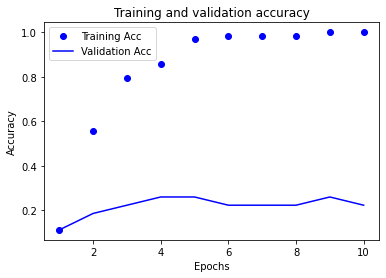

In [41]:
# Plotting Accuracy
# 정확도와 손실값의 변화를 보고, epoch를 어디에서 조절해야 할 지를 가늠한다.
# 정확도가 떨어지는 구간, 손실값이 높게 나타나는 구간을 확인한다
# 데이터가 큰 경우 대개 epoch를 늘려야 최적값에 도달한다
import matplotlib.pyplot as plt

# 정확도 그리기
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()            			

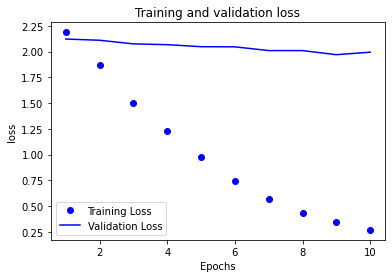

In [42]:
# Plotting Loss
plt.figure()            		# 새로운 그림을 그린다

# 손실값 그리기
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()            		

plt.show()

In [43]:
# Load Model
import os
from tensorflow.keras.models import load_model

filepath = '/content/gdrive/My Drive/pytest/'
os.chdir(filepath)
print("Current Directory:", os.getcwd())

loaded_model = load_model('text_multi_we_model.h5')
print("model loaded:", loaded_model)

with open('text_multi_we_tokenizer.pickle', 'rb') as handle:
       loaded_tokenizer = pickle.load(handle)

Current Directory: /content/gdrive/My Drive/pytest
model loaded: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f13d98d2da0>


In [44]:
# Test Data Loading
# 테스트 데이터의 텍스트와 라벨을 받아온다

texts, labels = make_texts_labels(test_dir, label_types)

print('texts 0:', texts[0])
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: ﻿나이 들어 아픈 허리 척추관협착증, 좁아진 신경통로 넓혀야 해결 가능

척추 내 신경이 지나가는 통로가 좁아지는 척추관협착증은 대표적인 퇴행성 척추 질환으로, 60대 이후 나이 들어서 생긴 허리 통증은 척추협착증일 확률이 상당히 높다. 나이가 들면 노화현상으로 인해 누구에게나 척추관이 좁아지는 증세가 찾아오기 때문이다. 건강보험심사평가원 통계에 따르면 척추관협착증 환자 수는 2014년 128만 3861명에서 2017년 154만 3477명으로 4년간 20% 이상 증가한 것으로 나타났다. 척추관협착증 환자들은 유독 다리의 통증을 호소한다. 걸을 때 다리가 터질 듯한 통증으로 가다 서다를 반복하거나 허리를 굽히거나 앉으면 통증이 줄어드는 증상이 있다면 척추관협착증일 수 있다.

부평힘찬병원 박진규 원장(신경외과 전문의)은 “척추관협착증은 척추 중앙의 척추관, 신경근관 또는 추간공이 좁아져 어느 부분이 협착되느냐에 따라 추간공협착증, 신경공협착증 등으로 세분화되기도 한다”며 “척추관이 연결된 목부터 꼬리뼈까지 어디에서든 발생할 수 있는데 대개 한 곳에서만 발생하기보다는 여러 곳에서 동시에 발생한다”고 설명했다.

척추관협착증은 허리를 구부릴 수 있는 척추 관절과 척추를 잡아주는 인대가 두꺼워지면서 신경관이 좁아져 다리로 가는 신경을 누르며 발생하는 질환이다. 초기 단계라면 선택적 주사요법, 물리치료와 운동치료 등을 통한 보존적 치료로 효과를 얻을 수 있다. 꽤 좁아진 경우에는 추간공 협착증 풍선확장술을 시행할 수도 있다. 국소 마취하에 척추의 꼬리뼈 쪽으로 풍선이 달린 가느다란 특수 카테터를 삽입, 카테터 관에 약물을 주입해 풍선을 부풀려 척추관을 넓히는 시술이다.

수술이 유일한 치료 방법일 경우도 있다. 통증이 심해 허리를 제대로 펴지 못하고, 5분 이상 걷기 힘들 때, 물리치료나 약물치료, 비수술 주사치료에도 더 이상 효과를 거둘 수 없을 때, 허리디스크와 동반되어 신경학적 결함이 뚜렷할 때 수술을 시행하게 된다. 수술은 척추관을 압박하는 요인

In [45]:
# 로딩된 tokenizer로 test 데이터를 Sequencing 한다
data = loaded_tokenizer.texts_to_sequences(texts) 	# 문자열을 숫자 리스트로 변환
x_test = pad_sequences(data, maxlen=maxlen)     	    # maxlen의 수만큼으로 2D 텐서를 만듦
print('data:', data)


# label에 해당하는 부분만 one-hot-encoding 한다.
# x_test = to_one_hot(data, dimension=max_words)
y_test = to_one_hot(labels, dimension=class_number)

data: [[3118, 1386, 191, 444, 260, 1408, 2123, 3118, 446, 43, 48, 62, 1100, 4919, 2503, 62, 77, 541, 62, 2861, 62, 1633, 3092, 222, 2125, 43, 2506, 48, 97, 43, 62, 48, 48, 3121, 2905, 2024, 60, 222, 2618, 1889, 2891, 2299, 78, 279, 76, 1898, 160, 160, 1889, 4193, 62, 4210, 1950, 2618, 48, 2024, 167, 176, 97, 8, 230, 241, 4, 6, 24], [237, 237, 664, 8, 237, 4871, 932, 180, 78, 4871, 1146, 1306, 996, 4414, 76, 755, 62, 4875, 4094], [76, 76, 510, 129, 281, 2310, 419, 76, 345, 129, 785, 3113, 1091, 72, 260, 2634, 1272, 785, 911, 1272, 61, 72, 47, 3113, 785, 357, 134, 345, 76, 1364, 43, 281, 176, 281, 723, 8], [2592, 3488, 1733, 4350, 3488, 13, 3488, 1705, 75, 729, 1213, 2634, 349, 1733, 4350, 2634, 419, 243, 4515, 444, 176, 3145, 44, 77, 45, 559, 4335, 2634, 349, 121, 1656, 4350, 1548, 75, 2665, 101, 1584, 430, 3488, 160, 44, 62, 13, 482, 1040, 922, 2321, 2139, 77, 62, 159, 76, 3416, 1584, 6, 475, 76, 2290, 413, 1548, 676, 2139, 4294, 118, 586, 75, 561, 4421, 75, 597, 2764, 8], [1534, 4871,

In [46]:
# Test Data Evaluation
test_eval = loaded_model.evaluate(x_test, y_test)
print('prediction model loss & acc:', test_eval)			# 44.4% 까지 나왔다

1/1 [==============================] - 0s 1ms/step - loss: 2.5196 - acc: 0.1111
prediction model loss & acc: [2.5196263790130615, 0.1111111119389534]


In [47]:
predictions = loaded_model.predict(x_test)
print('predictions shape:', predictions.shape)
print('prediction 0 shape:', predictions[0].shape)
print('prediction 0 sum', np.sum(predictions[0]))             # 모든 분류에 대한 확률의 총합은 1이 되어야 한다

print('prediction 0 value:', predictions[0])                  # 9개 분류 각각에 대한 확률값
print('prediction 0 max value:', np.argmax(predictions[0]))  	# prediction 0이 가지고 있는 가장 큰 값의 판정 결과
print('prediction 1 max value:', np.argmax(predictions[1]))   # prediction 1이 가지고 있는 가장 큰 값의 판정 결과
print('prediction 2 max value:', np.argmax(predictions[2]))   # prediction 2가 가지고 있는 가장 큰 값의 판정 결과

predictions shape: (27, 9)
prediction 0 shape: (9,)
prediction 0 sum 1.0
prediction 0 value: [0.07872369 0.07853802 0.1165388  0.18909352 0.01180593 0.26275572
 0.14990278 0.05204459 0.06059692]
prediction 0 max value: 5
prediction 1 max value: 5
prediction 2 max value: 5


In [48]:
# 1개 데이터 예측
text = ["안녕하세요, 이것은 테스트 문장입니다."]       	# list 타입으로 만든다

text=[rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in text]
print('형태소 분석 결과:', text)

data = loaded_tokenizer.texts_to_sequences(text)
x_test = pad_sequences(data, maxlen=maxlen)

predictions = loaded_model.predict(x_test)
print("Result:", predictions)                           # 각 분류에 대한 확률을 보여준다
print("분류 결과:", np.argmax(predictions[0]))         	# 가장 큰 확률값을 가진 분류 제시. 0~8 숫자 중 하나

형태소 분석 결과: [['안녕', '하', '이것', '테스트', '문장']]
Result: [[0.08843019 0.04880112 0.0701037  0.1731968  0.00869313 0.22836463
  0.24176934 0.06951203 0.07112912]]
분류 결과: 6
